# Task A- Understanding the Data

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score  
#importing the libraries used in the project

In [18]:
training_data = pd.read_csv('train.csv')
testing_data = pd.read_csv('test.csv') #loading the data into a dataframe.

In [19]:
training_data.head(5)   #viewing the data.

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [20]:
y_train = training_data['Activity'] #getting the target column in the y_traning part
X_train = training_data.drop(columns = ['Activity', 'subject']) #dropping the Target column from the X_train and subject which is of no use.
#similar with testing data.
y_test = testing_data['Activity']
X_test = testing_data.drop(columns = ['Activity', 'subject']) 

In [68]:
X_train.shape

(7352, 561)

In [23]:
y_train.shape

(7352,)

In [24]:
X_test.shape

(2947, 561)

In [25]:
y_test.shape

(2947,)

([<matplotlib.patches.Wedge at 0x1a182f26d8>,
 [Text(0.9071064061014833, 0.6222201925441275, 'LAYING'),
  Text(-0.23874635466468208, 1.073778458591122, 'SITTING'),
  Text(-1.0745883152841482, 0.2350743555872831, 'STANDING'),
  Text(-0.7193129027755119, -0.832219290752544, 'WALKING'),
  Text(0.29301586483507763, -1.0602554894717366, 'WALKING_DOWNSTAIRS'),
  Text(1.0038008332903794, -0.4498709671511825, 'WALKING_UPSTAIRS')],
 [Text(0.4947853124189908, 0.3393928322967968, '19.14'),
  Text(-0.13022528436255384, 0.5856973410497028, '18.69'),
  Text(-0.5861390810640807, 0.12822237577488166, '17.49'),
  Text(-0.3923524924230064, -0.453937794955933, '16.68'),
  Text(0.15982683536458778, -0.5783211760754926, '14.59'),
  Text(0.5475277272492978, -0.245384163900645, '13.41')])

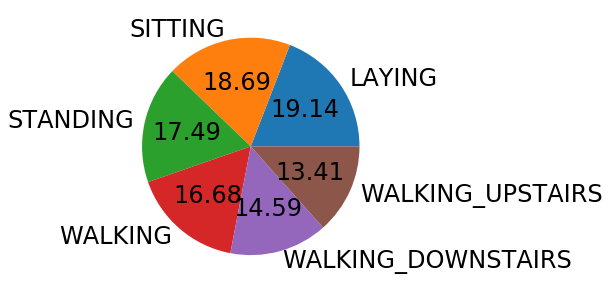

In [26]:
count_of_each_activity = np.array(y_train2.value_counts())
activities = sorted(y_train2.unique())
plt.rcParams.update({'figure.figsize': [5, 5], 'font.size': 24})
plt.pie(count_of_each_activity, labels = activities, autopct = '%0.2f') #getting the percentage of values for each label.
#Checking for Data distribution, if data is not equally distributed then we can do sampling .... which is not there in this case.

<BarContainer object of 3 artists>

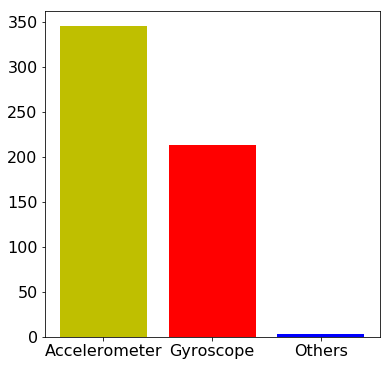

In [27]:
acc = 0
gyro = 0
others = 0
for column in X_train.columns:
    if 'Acc' in str(column):
        acc += 1
    elif 'Gyro' in str(column):
        gyro += 1
    else:
        others += 1

plt.rcParams.update({'figure.figsize': [6, 6], 'font.size': 16})
plt.bar(['Accelerometer', 'Gyroscope', 'Others'], [acc, gyro, others], color = ('y', 'r', 'b'))
#getting a count for Sensor readings.

In [42]:
le= LabelEncoder()

y_train2=le.fit_transform(y_train)

y_test2=le.fit_transform(y_test)
#We are using label encoders so that the string values in the target column are changed into numbers so that we can feed it to the model.

In [46]:
y_train2 

array([2, 2, 2, ..., 5, 5, 5])

# Task B: K-Nearest Neighbor Classification

In [240]:
k_range = range(1, 50) #generating a range for the number of neighbours in knn.

In [241]:
k_scores = [] #creating an empty list so than we can append the f1-scores of the knn model.

In [242]:
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)  #interating for 50 times in a loop.
    scores = cross_val_score(knn, X_train, y_train2, cv=10, scoring='f1_macro') #using cross validation with 10 folds and scoring metric of f1 macro.
    k_scores.append(scores.mean()) #aputting all the f1 scores into the list above created.
print(k_scores)

[0.8765719901946026, 0.8531905346938761, 0.8878911986611385, 0.8769952726011059, 0.8915903693527124, 0.8834595446393845, 0.893140510919508, 0.8891963168802892, 0.8944192332021377, 0.8897402339780829, 0.8947212031251146, 0.8917800730517194, 0.8960114052516737, 0.8940761749598755, 0.8963994804482575, 0.8940560260348269, 0.8957779833768214, 0.8946379732011016, 0.8965482210265145, 0.8954859349068942, 0.8978931536661243, 0.8958995152056841, 0.8978571186704922, 0.8960342410642157, 0.8974623220614996, 0.8955434506821325, 0.8958613621443758, 0.8937407490232502, 0.8932543917473705, 0.8926661968411873, 0.894588230080257, 0.8936575518375367, 0.8946800568613842, 0.8936428612956714, 0.8945509553012518, 0.8929681140373379, 0.8954157863539869, 0.8934376436749354, 0.8950706697874848, 0.8935620185170674, 0.8949878865237441, 0.892900285404498, 0.8935633987786012, 0.8928483036792597, 0.893915270561255, 0.892642785844828, 0.8934293480728727, 0.8918913811810347, 0.8929992772452134]


In [243]:
print('Length of list', len(k_scores))
print('Max of list', max(k_scores)) #checking the max of the f1-score to fetch the best k in knn.

Length of list 49
Max of list 0.8978931536661243


In [249]:
for k in k_scores:
    if k==max(k_scores):
        s=k_scores.index(max(k_scores))     #fetching the best k

In [250]:
s

20

Text(0, 0.5, 'Cross-validated accuracy')

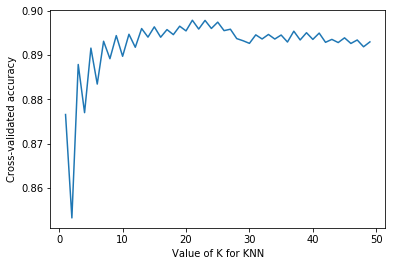

In [244]:
%matplotlib inline
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN') 
plt.ylabel('Cross-validated accuracy')     #plotting a graph between number of k and thier corresponding f1-scores.

In [251]:
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train, y_train2)    #Now that we have got the optimal value of K we are assigning a new model with that k.

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                     weights='uniform')

In [252]:
prediction=knn.predict(X_test) #predicting with the model created.

In [253]:
from sklearn.metrics import f1_score

In [254]:
f1_score(y_test2, prediction,average='weighted') #evaluating the model with f1-score again.

0.9025198403249137

# Task C: Multiclass Logistic Regression with Elastic Net

In [52]:
alpha=[1e-4,3e-4,1e-3,3e-3, 1e-2,3e-2]
l1_ratio=[0,0.15,0.5,0.7,1]         #initializing the values of alpha and l1 from the problem.

In [58]:
f_scores=[]

In [59]:
for a in alpha:
    for l1 in l1_ratio:   #permutating with for loop to find the best combination of alpha and l1.
        sgd=SGDClassifier(penalty="ElasticNet", alpha=a, l1_ratio=l1)     #using the logistic regression with Elasticnet regularization.
        sgd_scores=cross_val_score(sgd, X_train, y_train2, cv=10, scoring='f1_macro') 
        f_scores.append(sgd_scores.mean())
print(f_scores)

[0.9263779258421305, 0.9354689385966143, 0.9401037952992052, 0.938034213970707, 0.9325113983199016, 0.9307512356179364, 0.9447004741142386, 0.9431658493719244, 0.935879203380488, 0.9299633882467763, 0.9433349926361254, 0.9414298770863582, 0.9452439194161368, 0.9363122963616621, 0.9262169242624203, 0.9318770126447296, 0.9397181040551257, 0.9337367687515551, 0.9345705975705936, 0.9194545355841448, 0.9296217638440808, 0.9297283629472328, 0.9199419413979241, 0.9127479560254764, 0.9031194514426332, 0.917642509850998, 0.9093223946850308, 0.8688358609577824, 0.8483249459060884, 0.7146476285662563]


In [60]:
print('Max of list', max(f_scores))

Max of list 0.9452439194161368


In [61]:
f_scores.index(max(f_scores))

12

In [62]:
best_alpha=1e-3
best_l1=0.7

In [69]:
lstnew=[]
for a in alpha:
    for l1 in l1_ratio:
        lstnew.append([]) 

In [72]:
j=0
for a in alpha:
    for l1 in l1_ratio:
        lstnew[j].append(a)
        j=j+1               

In [73]:
j=0
for a in alpha:
    for l1 in l1_ratio:
        lstnew[j].append(l1)
        j=j+1  

In [76]:
for h in range((len(alpha)*len(l1_ratio))) :
        lstnew[h].append(f_scores[h])

In [79]:
x1=[]
y1=[]
z1=[]
for i in range((len(alpha)*len(l1_ratio))):
    x1.append(lstnew[i][0])      
    y1.append(lstnew[i][1])      
    z1.append(lstnew[i][2])  

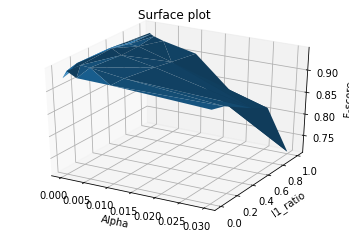

In [87]:
from mpl_toolkits import mplot3d

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_trisurf(x1,y1,z1)
ax.set_title('Surface plot')
ax.set_xlabel('Alpha')
ax.set_ylabel('l1_ratio')
ax.set_zlabel('F-score')
plt.show() 

In [63]:
sgd2=SGDClassifier(penalty="ElasticNet", alpha=best_alpha, l1_ratio=best_l1)
sgd2.fit(X_train, y_train2)

SGDClassifier(alpha=0.001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.7, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None,
              penalty='ElasticNet', power_t=0.5, random_state=None,
              shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
              warm_start=False)

In [64]:
predsgd=sgd2.predict(X_test)

In [67]:
f1_score(y_test2, predsgd,average='weighted')

0.9475299860481882

In [82]:
confusion_matrix(y_test2, predsgd)

array([[537,   0,   0,   0,   0,   0],
       [  0, 417,  71,   0,   0,   3],
       [  0,  15, 515,   2,   0,   0],
       [  0,   0,   0, 486,   4,   6],
       [  0,   1,   3,   3, 400,  13],
       [  0,   0,   0,  22,  11, 438]])

In [86]:
accuracy_score(y_test2, predsgd)

0.9477434679334917

# Task D: Support Vector Machine (RBF Kernel)

In [330]:
i_range=[1e-3, 1e-4]    #initializing gamma 
c_range=[1,10,100,1000]   ##initializing Cost function      

In [331]:
X_train.shape

(7352, 561)

In [332]:
y_train2.shape

(7352,)

In [333]:
svc_scores=[] #to get the score of 10 cv , when used with the Support vector classifier with the given parameters.
sv_scores=[]  #the average of the scores of the every 10 cv with a particular combination of c and i is appended in this list.

In [334]:
for c in c_range :
    for i in i_range:
        clf = SVC(C= c, kernel='rbf', gamma= i)
        svc_scores = cross_val_score(clf,X_train,y_train2, cv=10, scoring='f1_macro')
        sv_scores.append(svc_scores.mean())
print(sv_scores)

[0.9062493347058573, 0.7916066398942527, 0.9418178418507412, 0.9064341099475091, 0.9486829205354536, 0.9408281375549716, 0.9503034110992242, 0.9456119472253365]


In [336]:
print('Max of list', max(sv_scores))

Max of list 0.9503034110992242


In [354]:
lst=[]
for c in c_range :
    for i in i_range:
        lst.append([])     #Creating an empty list of size c*i to further store the combination of cost function and gamma with their F1- Scores.

In [355]:
j=0
for c in c_range :
    for i in i_range:
        lst[j].append(c)
        j=j+1               #appending the values of Cost function in the empty list created Above.

In [356]:
j=0
for c in c_range :
    for i in i_range:
        lst[j].append(i)
        j=j+1             #appending the values of Gamma in the list corresponding with their Cost function.

In [357]:
lst   #It looks as follows.

[[1, 0.001],
 [1, 0.0001],
 [10, 0.001],
 [10, 0.0001],
 [100, 0.001],
 [100, 0.0001],
 [1000, 0.001],
 [1000, 0.0001]]

In [358]:
for h in range(8) :
        lst[h].append(sv_scores[h])      #appending the values of f1 scores in the list with their corresponding values.

In [359]:
xi=[]
yi=[]
zi=[]
for i in range(8):
    xi.append(lst[i][0])      # in the xi we are storing all the values of cost function from the list
    yi.append(lst[i][1])      # in the xy we are storing all the values of gamma from the list
    zi.append(lst[i][2])      # in the xz we are storing all the values of thier corresponding. f1- scores.
    #All this is preprocessing of data to plot the surface plot.

In [360]:
print(xi)
print(yi)
print(zi)

[1, 1, 10, 10, 100, 100, 1000, 1000]
[0.001, 0.0001, 0.001, 0.0001, 0.001, 0.0001, 0.001, 0.0001]
[0.9062493347058573, 0.7916066398942527, 0.9418178418507412, 0.9064341099475091, 0.9486829205354536, 0.9408281375549716, 0.9503034110992242, 0.9456119472253365]


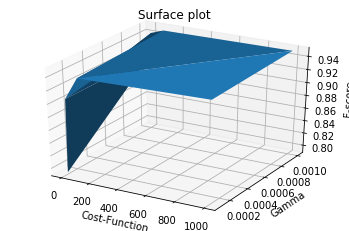

In [362]:
from mpl_toolkits import mplot3d

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_trisurf(xi,yi,zi)
ax.set_title('Surface plot')
ax.set_xlabel('Cost-Function')
ax.set_ylabel('Gamma')
ax.set_zlabel('F-score')
plt.show()      # with the values of xi,yi,zi we are plotting it on the surface plot.

In [363]:
clf2 = SVC(C= 100, kernel='rbf', gamma=0.0001)
clf2.fit(X_train, y_train2)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [364]:
predsvc=clf2.predict(X_test)

In [368]:
f1_score(y_test2, predsvc,average='weighted')

0.9551114028018496

# Task E: Random Forest

In [369]:
trees=[200,500,700]
depths=[300,500,600]
tree_scores=[]        #initializing the trees and deapths to find the best combination from among them.

In [370]:
for es in trees :
    for d in depths:
        rfc=RandomForestClassifier(n_estimators=es,max_depth=d)
        tscores = cross_val_score(rfc, X_train, y_train2, cv=10, scoring='f1_macro')
        tree_scores.append(tscores.mean())
print(tree_scores)

[0.9251233453089803, 0.9273011678470142, 0.9288498403190969, 0.9294940073213953, 0.9281777590607868, 0.9288210514698338, 0.9288442308679553, 0.9284533997565614, 0.9292028855271519]


In [371]:
print('Max of list', max(tree_scores))

Max of list 0.9294940073213953


In [379]:
tree_scores.index(0.9294940073213953)

3

In [ ]:
#500 tress with 300 max deapth

In [372]:
lst2=[]
for es in trees :
    for d in depths:
        lst2.append([])

In [373]:
j=0
for es in trees :
    for d in depths:
        lst2[j].append(es)
        j=j+1

In [374]:
j=0
for es in trees :
    for d in depths:
        lst2[j].append(d)
        j=j+1

In [375]:
for h in range(9) :
        lst2[h].append(tree_scores[h])

In [376]:
xa=[]
yb=[]
zc=[]
for i in range(9):
    xa.append(lst2[i][0])
    yb.append(lst2[i][1])
    zc.append(lst2[i][2])

In [377]:
lst2

[[200, 300, 0.9251233453089803],
 [200, 500, 0.9273011678470142],
 [200, 600, 0.9288498403190969],
 [500, 300, 0.9294940073213953],
 [500, 500, 0.9281777590607868],
 [500, 600, 0.9288210514698338],
 [700, 300, 0.9288442308679553],
 [700, 500, 0.9284533997565614],
 [700, 600, 0.9292028855271519]]

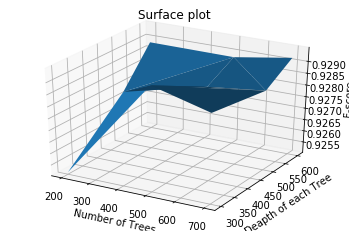

In [378]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_trisurf(xa,yb,zc)
ax.set_title('Surface plot')
ax.set_xlabel('Number of Trees')
ax.set_ylabel('Deapth of each Tree')
ax.set_zlabel('F-score')
plt.show()

In [401]:
rfc2=RandomForestClassifier(n_estimators=500,max_depth=300,)
rfc2.fit(X_train,y_train2)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=300, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [402]:
predrfc=rfc2.predict(X_test)

In [403]:
predrfc.shape

(2947,)

In [404]:
y_test2.shape

(2947,)

In [405]:
confusion_matrix(y_test2, predrfc)

array([[537,   0,   0,   0,   0,   0],
       [  0, 443,  48,   0,   0,   0],
       [  0,  33, 499,   0,   0,   0],
       [  0,   0,   0, 481,   8,   7],
       [  0,   0,   0,  20, 355,  45],
       [  0,   0,   0,  33,   5, 433]])

In [406]:
f1_score(y_test2, predrfc,average='weighted')

0.9322275365995241

In [407]:
accuracy_score(predrfc, y_test2)

0.9324737020699015

# Task F: Discussion

In [ ]:
#From among all the models Svc performed the best with highest Accuracy Score from among all of them with 95.5% Accuracy
#Knn performed the worst with 90% of Acuuracy
#We can tune the hyper-parameters to improve the accuracy to some extent.